Import libraries

Taken from website:-
https://ourworldindata.org/coronavirus-source-data

In [34]:
import pandas as pd
import numpy as np

Read files

In [35]:
# load datasets
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101338,ZWE,Africa,Zimbabwe,2021-07-05,56014.0,1540.0,1247.143,1911.0,33.0,23.143,3768.706,103.614,83.910,128.575,2.220,1.557,1.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3635.0,687102.0,46.229,0.245,7581.0,0.510,0.165,6.1,tests performed,1369436.0,797715.0,571721.0,8226.0,10040.0,9.21,5.37,3.85,676.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101339,ZWE,Africa,Zimbabwe,2021-07-06,57963.0,1949.0,1347.143,1939.0,28.0,25.429,3899.837,131.132,90.638,130.459,1.884,1.711,1.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10598.0,697700.0,46.942,0.713,7830.0,0.527,0.172,5.8,tests performed,1382567.0,807633.0,574934.0,13131.0,9567.0,9.30,5.43,3.87,644.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101340,ZWE,Africa,Zimbabwe,2021-07-07,60227.0,2264.0,1480.429,1973.0,34.0,26.286,4052.163,152.325,99.605,132.746,2.288,1.769,1.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10362.0,708062.0,47.639,0.697,7782.0,0.524,0.190,5.3,tests performed,1398757.0,819058.0,579699.0,16190.0,9474.0,9.41,5.51,3.90,637.0,NaN,14862927

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101343 entries, 0 to 101342
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               101343 non-null  object 
 1   continent                              96602 non-null   object 
 2   location                               101343 non-null  object 
 3   date                                   101343 non-null  object 
 4   total_cases                            97589 non-null   float64
 5   new_cases                              97586 non-null   float64
 6   new_cases_smoothed                     96576 non-null   float64
 7   total_deaths                           87401 non-null   float64
 8   new_deaths                             87557 non-null   float64
 9   new_deaths_smoothed                    96576 non-null   float64
 10  total_cases_per_million                97070 non-null   

Convert date to number

In [37]:
import datetime 

date = df.date

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date_num'] = df['date'].dt.strftime('%d%m%Y')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,date_num
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,24022020
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,25022020
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,26022020
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,27022020
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,28022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101338,ZWE,Africa,Zimbabwe,2021-07-05,56014.0,1540.0,1247.143,1911.0,33.0,23.143,3768.706,103.614,83.910,128.575,2.220,1.557,1.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3635.0,687102.0,46.229,0.245,7581.0,0.510,0.165,6.1,tests performed,1369436.0,797715.0,571721.0,8226.0,10040.0,9.21,5.37,3.85,676.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,05072021
101339,ZWE,Africa,Zimbabwe,2021-07-06,57963.0,1949.0,1347.143,1939.0,28.0,25.429,3899.837,131.132,90.638,130.459,1.884,1.711,1.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10598.0,697700.0,46.942,0.713,7830.0,0.527,0.172,5.8,tests performed,1382567.0,807633.0,574934.0,13131.0,9567.0,9.30,5.43,3.87,644.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,06072021
101340,ZWE,Africa,Zimbabwe,2021-07-07,60227.0,2264.0,1480.429,1973.0,34.0,26.286,4052.163,152.325,99.605,132.746,2.288,1.769,1.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10362.0,708062.0,47.639,0.697,7782.0,0.524,0.190,5.3,tests performed,

Percent new deaths to new cases

In [38]:
df['per_death_to_case'] = df.new_cases / df.new_deaths
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,date_num,per_death_to_case
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,24022020,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,25022020,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,26022020,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,27022020,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,28022020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101338,ZWE,Africa,Zimbabwe,2021-07-05,56014.0,1540.0,1247.143,1911.0,33.0,23.143,3768.706,103.614,83.910,128.575,2.220,1.557,1.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3635.0,687102.0,46.229,0.245,7581.0,0.510,0.165,6.1,tests performed,1369436.0,797715.0,571721.0,8226.0,10040.0,9.21,5.37,3.85,676.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,05072021,46.666667
101339,ZWE,Africa,Zimbabwe,2021-07-06,57963.0,1949.0,1347.143,1939.0,28.0,25.429,3899.837,131.132,90.638,130.459,1.884,1.711,1.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10598.0,697700.0,46.942,0.713,7830.0,0.527,0.172,5.8,tests performed,1382567.0,807633.0,574934.0,13131.0,9567.0,9.30,5.43,3.87,644.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,06072021,69.607143
101340,ZWE,Africa,Zimbabwe,2021-07-07,60227.0,2264.0,1480.429,1973.0,34.0,26.286,4052.163,152.325,99.605,132.746,2.288,1.769,1.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10362.0

Country

In [39]:
country = df['location'].to_list()

# using naive method to remove duplicated from list  
list_country = [] 
for i in country: 
    if i not in list_country: 
        list_country.append(i) 

list_country

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',


In [40]:
print(len(list_country))

231


Graphical Representation

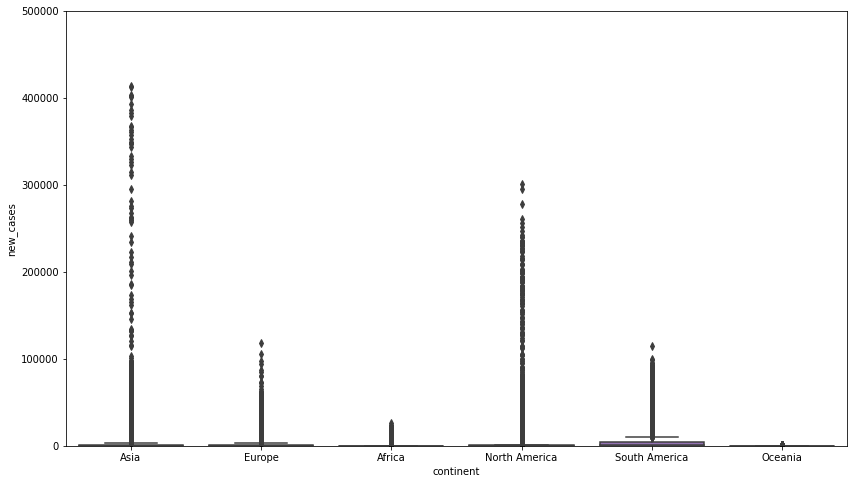

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

var = 'continent'
data = pd.concat([df['new_cases'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_cases", data=data)
fig.axis(ymin=0, ymax=500000);

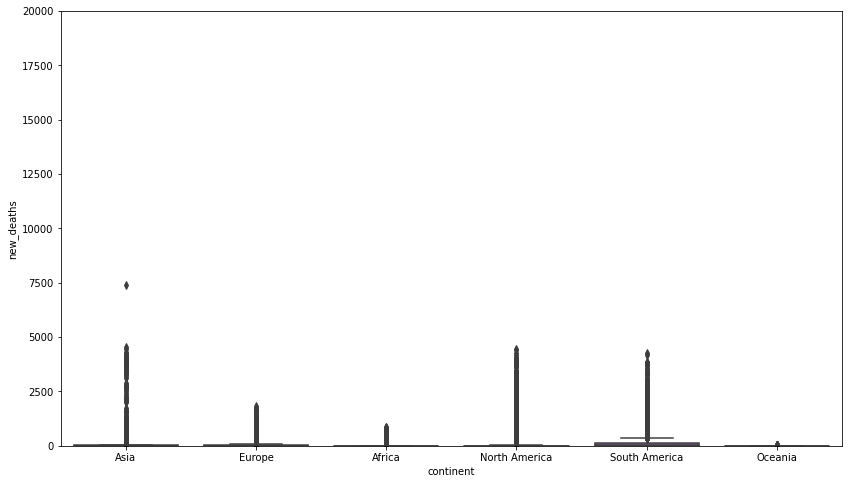

In [42]:
var = 'continent'
data = pd.concat([df['new_deaths'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_deaths", data=data)
fig.axis(ymin=0, ymax=20000);

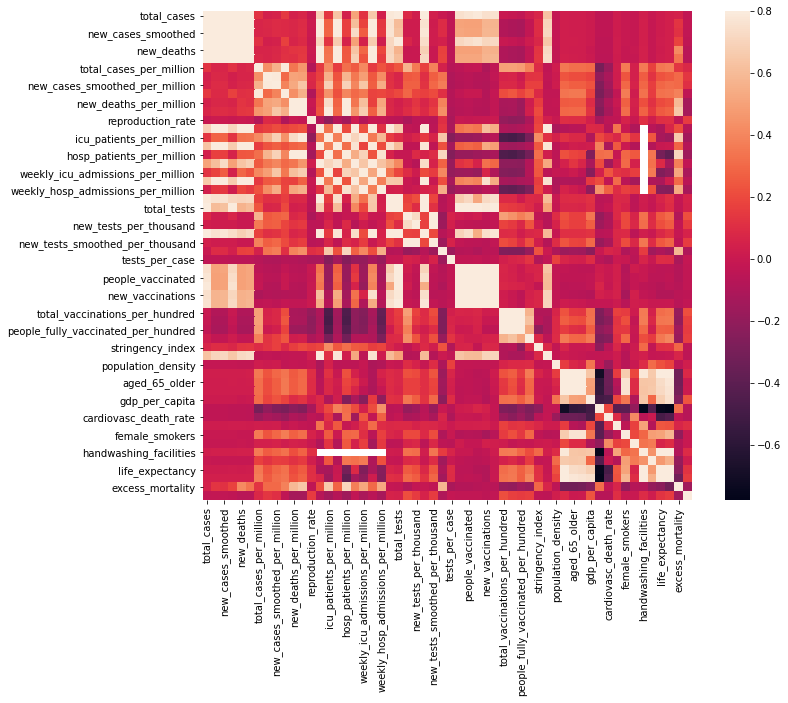

In [43]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Countries

In [44]:
country = "Israel"

include_Israel = df[df['location'].values == country]
exclude_Israel = df[df['location'].values != country]
Israel_cov19 = include_Israel
Israel_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,date_num,per_death_to_case
45123,ISR,Asia,Israel,2020-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,29.0,0.003,0.003,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,8655541.0,402.606,30.6,11.733,7.359,33132.32,0.5,93.32,6.74,15.4,35.4,NaN,2.99,82.97,0.919,NaN,20022020,NaN
45124,ISR,Asia,Israel,2020-02-21,1.0,1.0,NaN,NaN,NaN,NaN,0.116,0.116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,57.0,0.007,0.003,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,8655541.0,402.606,30.6,11.733,7.359,33132.32,0.5,93.32,6.74,15.4,35.4,NaN,2.99,82.97,0.919,NaN,21022020,NaN
45125,ISR,Asia,Israel,2020-02-22,1.0,0.0,NaN,NaN,NaN,NaN,0.116,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,70.0,0.008,0.002,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,8655541.0,402.606,30.6,11.733,7.359,33132.32,0.5,93.32,6.74,15.4,35.4,NaN,2.99,82.97,0.919,NaN,22022020,NaN
45126,ISR,Asia,Israel,2020-02-23,1.0,0.0,NaN,NaN,NaN,NaN,0.116,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,126.0,0.015,0.006,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,8655541.0,402.606,30.6,11.733,7.359,33132.32,0.5,93.32,6.74,15.4,35.4,NaN,2.99,82.97,0.919,0.47,23022020,NaN
45127,ISR,Asia,Israel,2020-02-24,1.0,0.0,NaN,NaN,NaN,NaN,0.116,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,201.0,0.023,0.009,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,8655541.0,402.606,30.6,11.733,7.359,33132.32,0.5,93.32,6.74,15.4,35.4,NaN,2.99,82.97,0.919,NaN,24022020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45624,ISR,Asia,Israel,2021-07-05,843465.0,496.0,324.143,6429.0,1.0,0.000,97447.982,57.304,37.449,742.761,0.116,0.000,1.76,15.0,1.733,75.0,8.665,NaN,NaN,NaN,NaN,72993.0,18182047.0,2100.625,8.433,60163.0,6.951,0.005,185.6,tests performed,10844146.0,5663378.0,5180768.0,20473.0,16336.0,125.29,65.43,59.85,1887.0,NaN,8655541.0,402.606,30.6,11.733,7.359,33132.32,0.5,93.32,6.74,15.4,35.4,NaN,2.99,82.97,0.919,NaN,05072021,496.000000
45625,ISR,Asia,Israel,2021-07-06,843892.0,427.0,343.714,6429.0,0.0,0.000,97497.314,49.333,39.710,742.761,0.000,0.000,1.76,14.0,1.617,87.0,10.051,NaN,NaN,NaN,NaN,85530.0,18267577.0,2110.507,9.882,62667.0,7.240,0.005,182.3,tests performed,10865004.0,5681047.0,5183957.0,20858.0,16457.0,125.53,65.63,59.89,1901.0,NaN,8655541.0,402.606,30.6,11.733,7.359,33132.32,0.5,93.32,6.74,15.4,35.4,NaN,2.99,82.97,0.919,NaN,06072021,inf
45626,ISR,Asia,Israel,2021-07-07,844378.0,486.0,371.571,6429.0,0.0

In [45]:
country = "United States"

include_us = df[df['location'].values == country]
exclude_us = df[df['location'].values != country]
us_cov19 = include_us
us_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,date_num,per_death_to_case
96039,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,22012020,NaN
96040,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,23012020,NaN
96041,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,24012020,NaN
96042,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,25012020,NaN
96043,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,0.75,26012020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96569,USA,North America,United States,2021-07-05,33723289.0,5528.0,11826.714,605572.0,46.0,213.000,101882.234,16.701,35.730,1829.508,0.139,0.643,1.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175006.0,472035159.0,1426.077,0.529,460807.0,1.392,0.032,31.2,tests performed,NaN,NaN,NaN,NaN,927847.0,NaN,NaN,NaN,2774.0,33.8,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,05072021,120.173913
96570,USA,North America,United States,2021-07-06,33747513.0,24224.0,13665.857,605906.0,334.0,215.857,101955.417,73.184,41.286,1830.517,1.009,0.652,1.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148460.0,472183619.0,1426.525,0.449,385702.0,1.165,0.037,27.0,tests performed,331214347.0,182714064.0,157636088.0,NaN,865929.0,99.03,54.63,47.13,2589.0,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,06072021,72.526946
96571,USA,North America

Israel

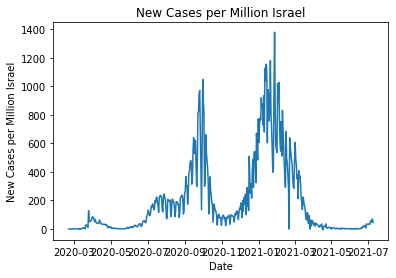

In [46]:
plt.plot(Israel_cov19.date, Israel_cov19.new_cases_per_million)
plt.xlabel('Date')
plt.ylabel('New Cases per Million Israel')
plt.title('New Cases per Million Israel')
plt.show()

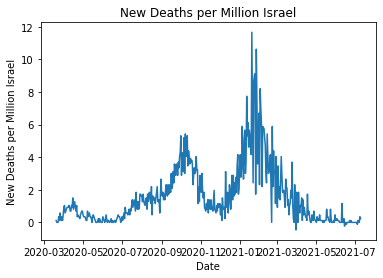

In [47]:
plt.plot(Israel_cov19.date, Israel_cov19.new_deaths_per_million)
plt.xlabel('Date')
plt.ylabel('New Deaths per Million Israel')
plt.title('New Deaths per Million Israel')
plt.show()

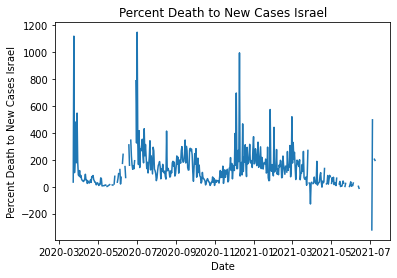

In [48]:
plt.plot(Israel_cov19.date, Israel_cov19.per_death_to_case)
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases Israel')
plt.title('Percent Death to New Cases Israel')
plt.show()

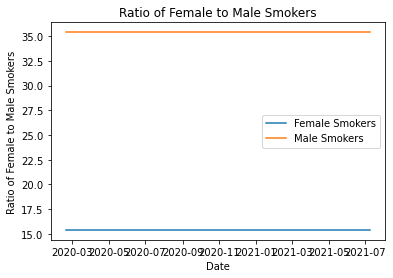

In [49]:
plt.plot(Israel_cov19.date, Israel_cov19.female_smokers)
plt.plot(Israel_cov19.date, Israel_cov19.male_smokers)
plt.legend(['Female Smokers', 'Male Smokers'])
plt.xlabel('Date')
plt.ylabel('Ratio of Female to Male Smokers')
plt.title('Ratio of Female to Male Smokers')
plt.show()

US

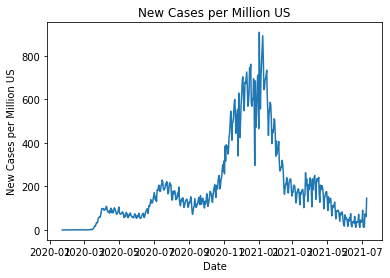

In [50]:
plt.plot(us_cov19.date, us_cov19.new_cases_per_million)
plt.xlabel('Date')
plt.ylabel('New Cases per Million US')
plt.title('New Cases per Million US')
plt.show()

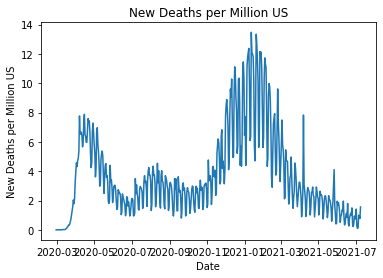

In [51]:
plt.plot(us_cov19.date, us_cov19.new_deaths_per_million)
plt.xlabel('Date')
plt.ylabel('New Deaths per Million US')
plt.title('New Deaths per Million US')
plt.show()

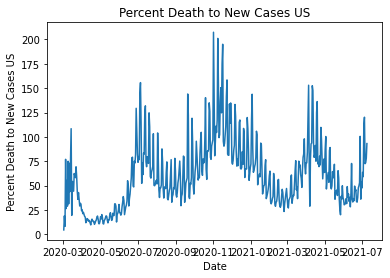

In [52]:
plt.plot(us_cov19.date, us_cov19.per_death_to_case)
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases US')
plt.title('Percent Death to New Cases US')
plt.show()

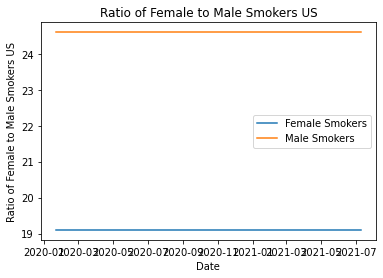

In [53]:
plt.plot(us_cov19.date, us_cov19.female_smokers)
plt.plot(us_cov19.date, us_cov19.male_smokers)
plt.legend(['Female Smokers', 'Male Smokers'])
plt.xlabel('Date')
plt.ylabel('Ratio of Female to Male Smokers US')
plt.title('Ratio of Female to Male Smokers US')
plt.show()

Comparisons

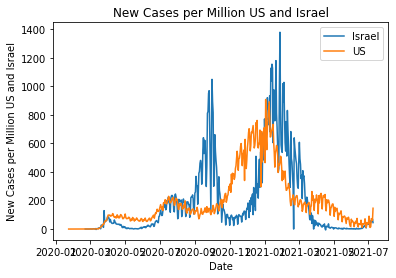

In [54]:
plt.plot(Israel_cov19.date, Israel_cov19.new_cases_per_million)
plt.plot(us_cov19.date, us_cov19.new_cases_per_million)
plt.legend(['Israel', 'US'])
plt.xlabel('Date')
plt.ylabel('New Cases per Million US and Israel')
plt.title('New Cases per Million US and Israel')
plt.show()

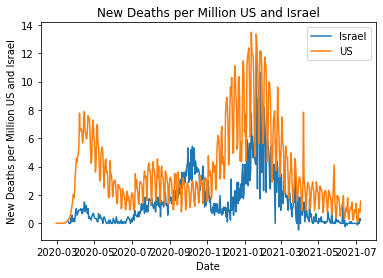

In [55]:
plt.plot(Israel_cov19.date, Israel_cov19.new_deaths_per_million)
plt.plot(us_cov19.date, us_cov19.new_deaths_per_million)
plt.legend(['Israel', 'US'])
plt.xlabel('Date')
plt.ylabel('New Deaths per Million US and Israel')
plt.title('New Deaths per Million US and Israel')
plt.show()

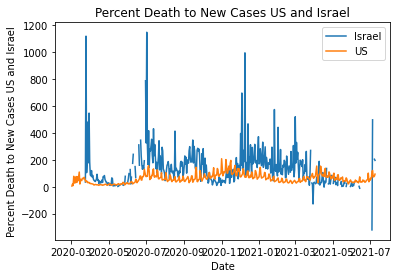

In [56]:
plt.plot(Israel_cov19.date, Israel_cov19.per_death_to_case)
plt.plot(us_cov19.date, us_cov19.per_death_to_case)
plt.legend(['Israel', 'US'])
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases US and Israel')
plt.title('Percent Death to New Cases US and Israel')
plt.show()

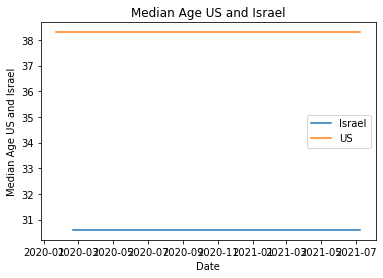

In [57]:
plt.plot(Israel_cov19.date, Israel_cov19.median_age)
plt.plot(us_cov19.date, us_cov19.median_age)
plt.legend(['Israel', 'US'])
plt.xlabel('Date')
plt.ylabel('Median Age US and Israel')
plt.title('Median Age US and Israel')
plt.show()

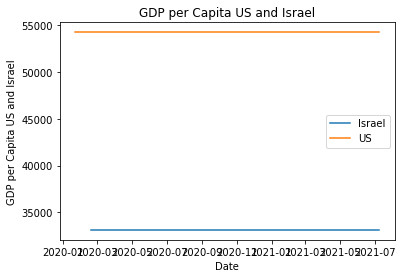

In [58]:
plt.plot(Israel_cov19.date, Israel_cov19.gdp_per_capita)
plt.plot(us_cov19.date, us_cov19.gdp_per_capita)
plt.legend(['Israel', 'US'])
plt.xlabel('Date')
plt.ylabel('GDP per Capita US and Israel')
plt.title('GDP per Capita US and Israel')
plt.show()

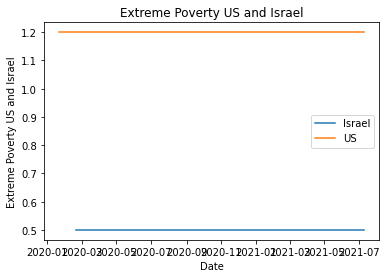

In [59]:
plt.plot(Israel_cov19.date, Israel_cov19.extreme_poverty)
plt.plot(us_cov19.date, us_cov19.extreme_poverty)
plt.legend(['Israel', 'US'])
plt.xlabel('Date')
plt.ylabel('Extreme Poverty US and Israel')
plt.title('Extreme Poverty US and Israel')
plt.show()

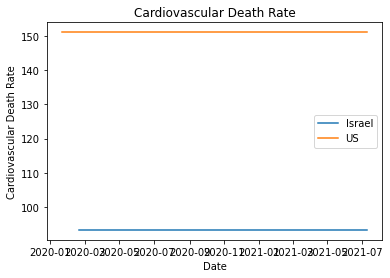

In [60]:
plt.plot(Israel_cov19.date, Israel_cov19.cardiovasc_death_rate)
plt.plot(us_cov19.date, us_cov19.cardiovasc_death_rate)
plt.legend(['Israel', 'US'])
plt.xlabel('Date')
plt.ylabel('Cardiovascular Death Rate')
plt.title('Cardiovascular Death Rate')
plt.show()

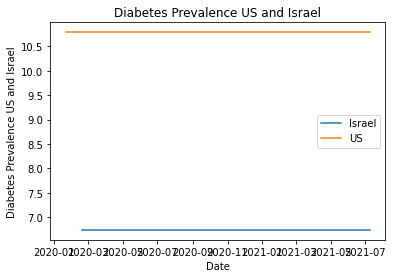

In [61]:
plt.plot(Israel_cov19.date, Israel_cov19.diabetes_prevalence)
plt.plot(us_cov19.date, us_cov19.diabetes_prevalence)
plt.legend(['Israel', 'US'])
plt.xlabel('Date')
plt.ylabel('Diabetes Prevalence US and Israel')
plt.title('Diabetes Prevalence US and Israel')
plt.show()

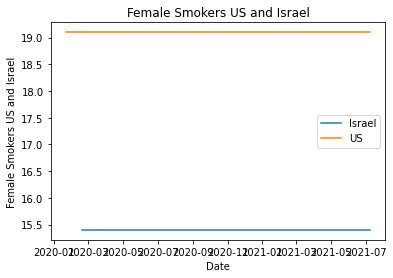

In [62]:
plt.plot(Israel_cov19.date, Israel_cov19.female_smokers)
plt.plot(us_cov19.date, us_cov19.female_smokers)
plt.legend(['Israel', 'US'])
plt.xlabel('Date')
plt.ylabel('Female Smokers US and Israel')
plt.title('Female Smokers US and Israel')
plt.show()

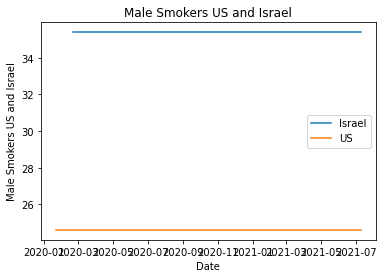

In [63]:
plt.plot(Israel_cov19.date, Israel_cov19.male_smokers)
plt.plot(us_cov19.date, us_cov19.male_smokers)
plt.legend(['Israel', 'US'])
plt.xlabel('Date')
plt.ylabel('Male Smokers US and Israel')
plt.title('Male Smokers US and Israel')
plt.show()

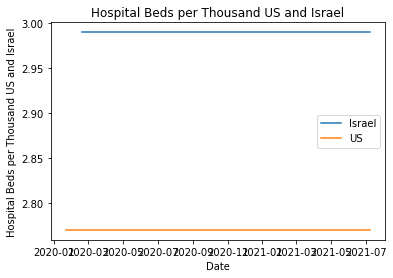

In [64]:
plt.plot(Israel_cov19.date, Israel_cov19.hospital_beds_per_thousand)
plt.plot(us_cov19.date, us_cov19.hospital_beds_per_thousand)
plt.legend(['Israel', 'US'])
plt.xlabel('Date')
plt.ylabel('Hospital Beds per Thousand US and Israel')
plt.title('Hospital Beds per Thousand US and Israel')
plt.show()

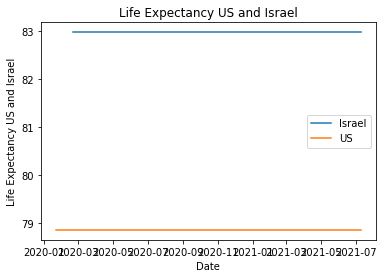

In [65]:
plt.plot(Israel_cov19.date, Israel_cov19.life_expectancy)
plt.plot(us_cov19.date, us_cov19.life_expectancy)
plt.legend(['Israel', 'US'])
plt.xlabel('Date')
plt.ylabel('Life Expectancy US and Israel')
plt.title('Life Expectancy US and Israel')
plt.show()

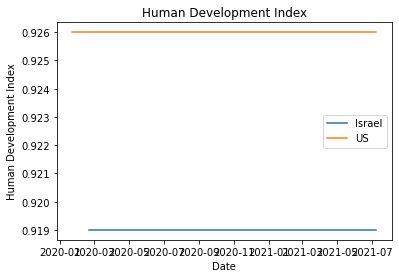

In [66]:
plt.plot(Israel_cov19.date, Israel_cov19.human_development_index)
plt.plot(us_cov19.date, us_cov19.human_development_index)
plt.legend(['Israel', 'US'])
plt.xlabel('Date')
plt.ylabel('Human Development Index')
plt.title('Human Development Index')
plt.show()